In [1]:
import pandas as pd

candidate = "JN"

df=pd.read_json(f'../metrics/sound/{candidate}_eval.json').T

df.head()

,rectified_input,transcription_gt,object_list,objects_gt,split_command,split_commands_gt,classification,classification_gt,intensity_list,intensity_list_gt
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Move a bit closer to bowl but stay away from vase,Move a bit closer to bowl but stay away from b...,"[bowl, vase]","[bowl, bottle]","[Move a bit closer to bowl, stay away from vase]","[Move a bit closer to bowl, stay away from bot...","[bowl distance decrease, vase distance increase]","[bowl distance decrease, bottle distance incre...",NaN,NaN
3,Stay close to mark and stay low,Stay close to mug and stay low,[],[mug],"[Stay close to mark, stay low]","[Stay close to mug, stay low]","[mark distance decrease, Z-cartesian decrease]","[mug distance decrease, Z-cartesian decrease]",NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
candidate = "Brian"

df=pd.read_json(f'../metrics/sound/{candidate}_eval.json').T

success = df.index[df['classification'].isna()].tolist()
acc = (len(success)/len(df)) * 100


failure = df.index[~df['classification'].isna()].tolist()

sub_df = df.loc[failure]

if sub_df['object_list'].isna().any():
    print(True)

print(f"Accuracy: {acc}%")
sub_df


True
Accuracy: 65.0%


,rectified_input,transcription_gt,object_list,objects_gt,split_command,split_commands_gt,classification,classification_gt,intensity_list,intensity_list_gt
2,"Move a bit closer to bowl, but stay away from ...",Move a bit closer to bowl but stay away from b...,"[bowl, flask]","[bowl, bottle]","[Move a bit closer to bowl, but stay away from...","[Move a bit closer to bowl, stay away from bot...","[bowl distance decrease, flask distance increase]","[bowl distance decrease, bottle distance incre...",NaN,NaN
6,Go closer to tumbler and cut,Go closer to bottle and mug,[tumbler],"[bottle, mug]","[Go closer to tumbler, cut]","[Go closer to bottle, Go closer to mug]","[tumbler distance decrease, none]","[bottle distance decrease, mug distance decrease]","[[NEUTRAL, DISTANCE], [NEUTRAL, NONE]]","[[NEUTRAL, DISTANCE], [NEUTRAL, DISTANCE]]"
7,Keep a distance to scissors,Move front but keep a distance to scissors,NaN,NaN,[Keep a distance to scissors],"[Move front, keep a distance to scissors]",[scissors distance increase],"[Y-cartesian increase, scissors distance incre...","[[NEUTRAL, DISTANCE]]","[[NEUTRAL, DISTANCE], [NEUTRAL, DISTANCE]]"
8,Move fast when closer to bus,Move fast when closer to vase,[bus],[vase],[Move fast when closer to bus],[Move fast when closer to vase],"[bus distance decrease, speed increase]","[speed increase, vase distance decrease]",NaN,NaN
12,Move a bit closer to bowl but stay away from f...,Move a bit closer to bowl but stay away from b...,"[bowl, flask]","[bowl, bottle]","[Move a bit closer to bowl, stay away from flask]","[Move a bit closer to bowl, stay away from bot...","[bowl distance decrease, flask distance increase]","[bowl distance decrease, bottle distance incre...",NaN,NaN
16,Go closer to tumbler end card,Go closer to bottle and mug,[tumbler],"[bottle, mug]",[Go closer to tumbler end card],"[Go closer to bottle, Go closer to mug]",[tumbler distance decrease],"[mug distance decrease, mug distance decrease]","[[NEUTRAL, DISTANCE]]","[[NEUTRAL, DISTANCE], [NEUTRAL, DISTANCE]]"
18,Move fast when closer to bowl,Move fast when closer to vase,[bowl],[vase],[Move fast when closer to bowl],[Move fast when closer to vase],"[bowl distance decrease, speed increase]","[speed increase, vase distance decrease]",NaN,NaN


In [3]:
def get_metrics(candidate: str) -> dict:
    df=pd.read_json(f'../metrics/sound/{candidate}_eval.json').T
    success = df.index[df['classification'].isna()].tolist()
    acc = (len(success)/len(df)) * 100

    failure = df.index[~df['classification'].isna()].tolist()
    
    sub_df = df.loc[failure]

    failure_obj = sub_df.index[~sub_df['object_list'].isna()].tolist()
    failure_transc = sub_df.index[sub_df['object_list'].isna()].tolist()

    print(f"Candidate: {candidate}| Accuracy: {acc}%")

    res = {
        "id" : candidate,
        "success_idx" : success,
        "failure_obj_idx" : failure_obj,
        "failure_transc_idx" : failure_transc,
        "accuracy" : f"{acc}%"
    }

    return res
res = get_metrics("Brian")

res


Candidate: Brian| Accuracy: 65.0%


{'id': 'Brian',
 'success_idx': [1, 3, 4, 5, 9, 10, 11, 13, 14, 15, 17, 19, 20],
 'failure_obj_idx': [2, 6, 8, 12, 16, 18],
 'failure_transc_idx': [7],
 'accuracy': '65.0%'}

In [4]:
import os
from pathlib import Path

res = []
for name in os.listdir("../confidential_data"):
   indiv_res = get_metrics(candidate=name)
   res.append(indiv_res)



FileNotFoundError: [Errno 2] No such file or directory: '../confidential_data'

In [5]:
import string 

df=pd.read_json(f'../metrics/semantic/Arun_eval.json').T
transc_error_idx = df.index[~df['rectified_input'].isna()].tolist()
correct_idx = df.index[df['rectified_input'].isna()].tolist()

correct_transcription_count = len(correct_idx)
incorrect_transcription_count = len(transc_error_idx)

for i in transc_error_idx:
    rectified_input = df.loc[i]['rectified_input'].translate(str.maketrans('', '', string.punctuation)).lower()
    ground_truth = df.loc[i]['transcription_gt'].translate(str.maketrans('', '', string.punctuation)).lower()
    if rectified_input != ground_truth:
        print(f"Rectified: {rectified_input} | Ground Truth: {ground_truth}")
        incorrect_transcription_count += 1
    else:
        correct_transcription_count += 1

print(round((correct_transcription_count/len(df)) * 100, 2), incorrect_transcription_count/len(df))

Rectified: move a bit closer to bull but stay away from bottle | Ground Truth: move a bit closer to bowl but stay away from bottle
Rectified: go closer to mug | Ground Truth: go closer to bottle and mug
Rectified: move forward but keep a distance to scissors | Ground Truth: move front but keep a distance to scissors
Rectified: move fast when closer to bus | Ground Truth: move fast when closer to vase
Rectified: move a bit closer to bowl but stay away from flask | Ground Truth: move a bit closer to bowl but stay away from bottle
Rectified: go closer to mug | Ground Truth: go closer to bottle and mug
Rectified: move to front but keep a distance to scissors | Ground Truth: move front but keep a distance to scissors
Rectified: move fast when closer to bus | Ground Truth: move fast when closer to vase
60.0 0.85


In [ ]:
import os
from pathlib import Path

res = []
for name in os.listdir("../confidential_data"):
   indiv_res = get_metrics(candidate=name)
   res.append(indiv_res)



Candidate: XinZhi| Accuracy: 55.00000000000001%
Candidate: Meiwen| Accuracy: 40.0%
Candidate: Malthus| Accuracy: 70.0%
Candidate: RuiQian| Accuracy: 35.0%
Candidate: JN| Accuracy: 60.0%
Candidate: MinThet| Accuracy: 65.0%
Candidate: JunWei| Accuracy: 60.0%
Candidate: RuiBin| Accuracy: 60.0%
Candidate: MinnSet| Accuracy: 60.0%
Candidate: ChorTeng| Accuracy: 55.00000000000001%
Candidate: Brian| Accuracy: 65.0%
Candidate: Joan| Accuracy: 70.0%
Candidate: Arun| Accuracy: 65.0%
Candidate: Heather| Accuracy: 55.00000000000001%


### **AVERAGE - Feature accuracy** ###

In [ ]:
import json

with open('../metrics/score/semantic.json', 'r') as f:
    data = json.load(f)

length = len(data)
total = 0

for i in range(length):
    total += int(round(float(data[i]["feature_accuracy"].strip("%"))))

avg = total/length

print(f"SEMANTIC AVERAGE ACCURACY: {round(avg,3)}%")

with open('../metrics/score/sound.json', 'r') as f:
    data = json.load(f)

length = len(data)
total = 0

for i in range(length):
    total += int(round(float(data[i]["feature_accuracy"].strip("%"))))
avg = total/length

print(f"SOUND AVERAGE ACCURACY: {round(avg,3)}%")


SEMANTIC AVERAGE ACCURACY: 63.214%
SOUND AVERAGE ACCURACY: 58.214%


### **AVERAGE - Transcription accuracy** ###

In [ ]:
import json

with open('../metrics/score/semantic.json', 'r') as f:
    data = json.load(f)

length = len(data)
total = 0

for i in range(length):
    total += int(round(float(data[i]["transcript_accuracy"].strip("%"))))

avg = total/length

print(f"SEMANTIC AVERAGE ACCURACY: {round(avg,3)}%")

with open('../metrics/score/sound.json', 'r') as f:
    data = json.load(f)

length = len(data)
total = 0

for i in range(length):
    total += int(round(float(data[i]["transcript_accuracy"].strip("%"))))
avg = total/length

print(f"SOUND AVERAGE ACCURACY: {round(avg,3)}%")


SEMANTIC AVERAGE ACCURACY: 51.786%
SOUND AVERAGE ACCURACY: 55.357%


### **EXAMPLES**

In [1]:
import json
from collections import Counter

with open('../metrics/score/semantic.json', 'r') as f:
    data = json.load(f)

for i in range(len(data)):
    print(data[i]["id"], (data[i]["feature_accuracy"]))

XinZhi 55.0%
Meiwen 45.0%
Malthus 80.0%
RuiQian 20.0%
JN 65.0%
MinThet 65.0%
JunWei 65.0%
RuiBin 70.0%
MinnSet 60.0%
ChorTeng 70.0%
Brian 65.0%
Joan 80.0%
Arun 70.0%
Heather 75.0%


In [32]:
import json

with open('../metrics/score/semantic.json', 'r') as f:
    data = json.load(f)

hashmap_semantic = {}
for i in range(len(data)):
    hashmap_semantic[data[i]["id"]] = float((data[i]["transcript_accuracy"]).replace("%", "")), (float((data[i]["feature_accuracy"]).replace("%", "")))
    
with open('../metrics/score/sound.json', 'r') as f:
    data = json.load(f)

hashmap_sound = {}
for i in range(len(data)):
    hashmap_sound[data[i]["id"]] = float((data[i]["transcript_accuracy"]).replace("%", "")), (float((data[i]["feature_accuracy"]).replace("%", "")))

hashmap_semantic

{'XinZhi': (45.0, 55.0),
 'Meiwen': (40.0, 45.0),
 'Malthus': (70.0, 80.0),
 'RuiQian': (10.0, 20.0),
 'JN': (55.0, 65.0),
 'MinThet': (45.0, 65.0),
 'JunWei': (50.0, 65.0),
 'RuiBin': (60.0, 70.0),
 'MinnSet': (45.0, 60.0),
 'ChorTeng': (60.0, 70.0),
 'Brian': (55.0, 65.0),
 'Joan': (65.0, 80.0),
 'Arun': (60.0, 70.0),
 'Heather': (65.0, 75.0)}

## **SEMANTIC** ##

In [33]:
import pandas as pd
df = pd.DataFrame.from_dict(hashmap_semantic, orient='index', columns=['Transcript_Accuracy', 'Feature_Accuracy'])
df.columns = ["transcript_accuracy", "feature_accuracy"]
df.index.name = 'Name'
df

,transcript_accuracy,feature_accuracy
Name,,
XinZhi,45.0,55.0
Meiwen,40.0,45.0
Malthus,70.0,80.0
RuiQian,10.0,20.0
JN,55.0,65.0
MinThet,45.0,65.0
JunWei,50.0,65.0
RuiBin,60.0,70.0
MinnSet,45.0,60.0


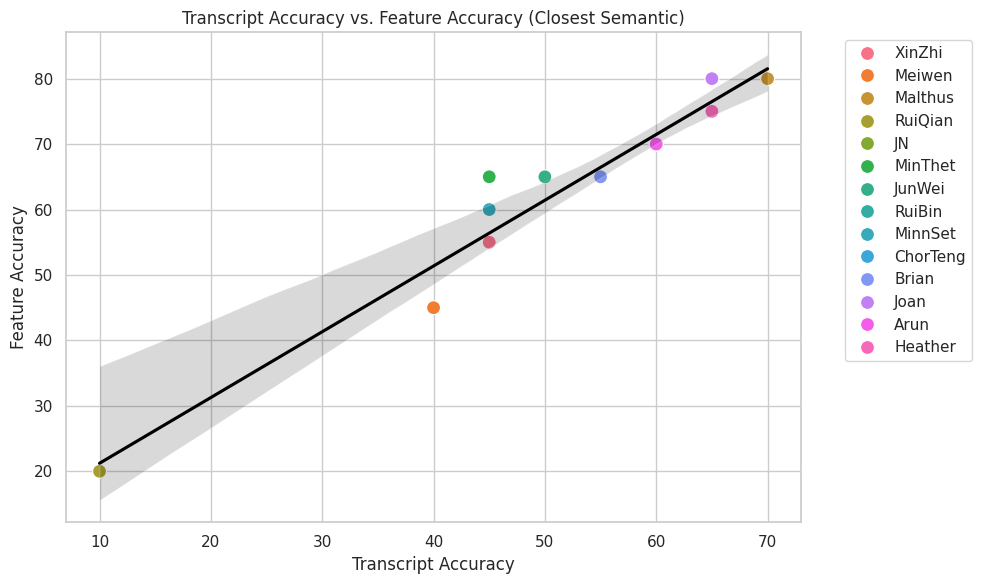

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
sns.set_theme(style="whitegrid")

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatterplot
sns.scatterplot(data=df, x='transcript_accuracy', y='feature_accuracy', hue='Name', s=100)

# Add a regression line to the same plot to show the trend
sns.regplot(data=df, x='transcript_accuracy', y='feature_accuracy', scatter=False, color='black')
# plt.plot([10, 80], [10, 80], 'k-', color='blue')

plt.title('Transcript Accuracy vs. Feature Accuracy (Closest Semantic)')
plt.xlabel('Transcript Accuracy')
plt.ylabel('Feature Accuracy')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


## **SOUND** ##

In [35]:
df1 = pd.DataFrame.from_dict(hashmap_sound, orient='index', columns=['Transcript_Accuracy', 'Feature_Accuracy'])
df1.columns = ["transcript_accuracy", "feature_accuracy"]
df1.index.name = 'Name'
df1

,transcript_accuracy,feature_accuracy
Name,,
XinZhi,55.0,55.0
Meiwen,40.0,40.0
Malthus,65.0,70.0
RuiQian,35.0,35.0
JN,55.0,60.0
MinThet,50.0,65.0
JunWei,55.0,60.0
RuiBin,60.0,60.0
MinnSet,50.0,60.0


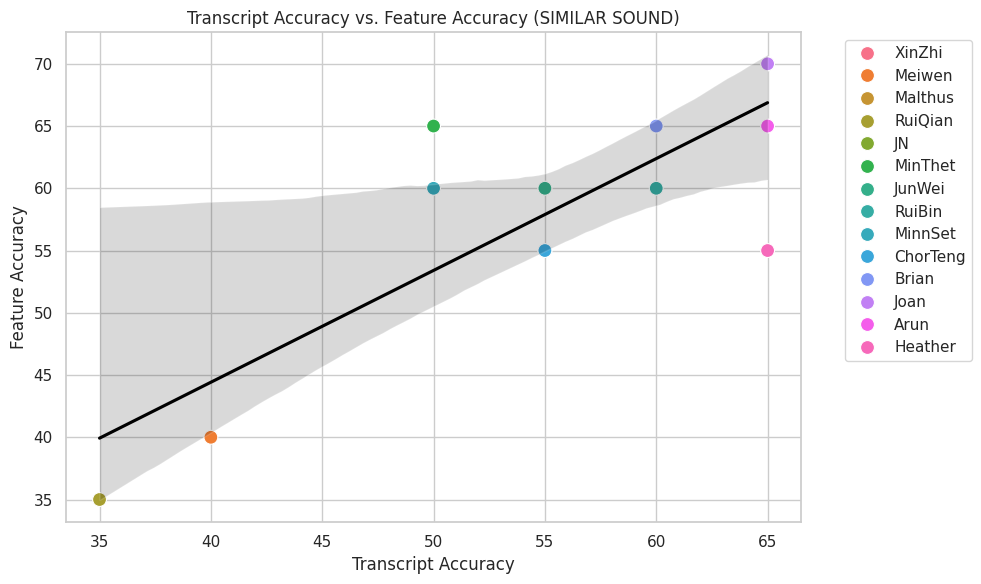

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame
sns.set_theme(style="whitegrid")

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatterplot
sns.scatterplot(data=df1, x='transcript_accuracy', y='feature_accuracy', hue='Name', s=100)

# Add a regression line to the same plot to show the trend
sns.regplot(data=df1, x='transcript_accuracy', y='feature_accuracy', scatter=False, color='black')
# plt.plot([10, 80], [10, 80], 'k-', color='blue')

plt.title('Transcript Accuracy vs. Feature Accuracy (SIMILAR SOUND)')
plt.xlabel('Transcript Accuracy')
plt.ylabel('Feature Accuracy')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [37]:
combined = pd.merge(df, df1, on='Name', suffixes=('_semantic', '_sound'), how='inner')
combined.drop(columns=['transcript_accuracy_sound', 'transcript_accuracy_semantic'], inplace=True)
combined.rename(columns={"feature_accuracy_semantic": "Semantic", "feature_accuracy_sound": "Sound"}, inplace=True)
combined.reset_index(inplace=True)
combined

,Name,Semantic,Sound
0,XinZhi,55.0,55.0
1,Meiwen,45.0,40.0
2,Malthus,80.0,70.0
3,RuiQian,20.0,35.0
4,JN,65.0,60.0
5,MinThet,65.0,65.0
6,JunWei,65.0,60.0
7,RuiBin,70.0,60.0
8,MinnSet,60.0,60.0
9,ChorTeng,70.0,55.0


## **Semantic VS Sound Feature accuracy** ##

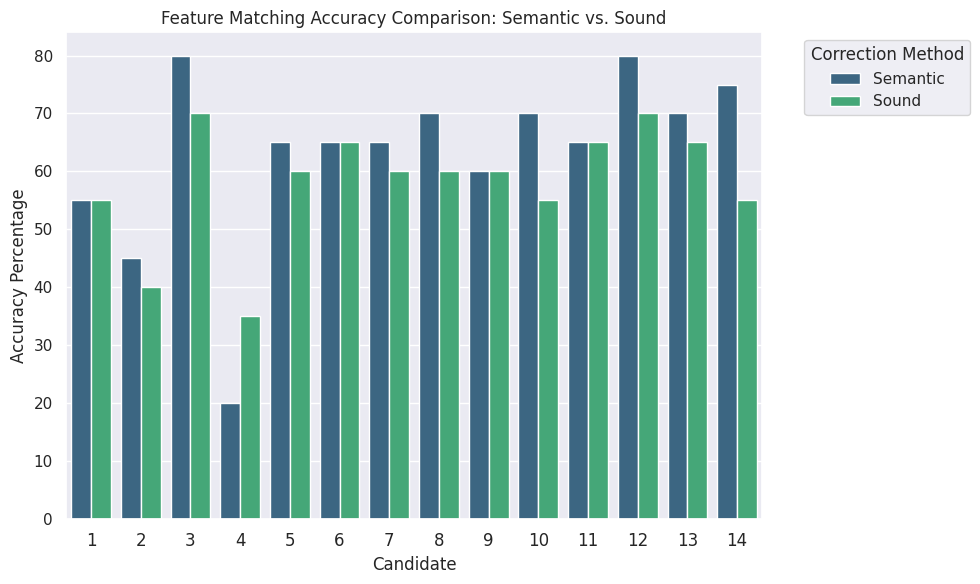

In [38]:
combined = pd.merge(df, df1, on='Name', suffixes=('_semantic', '_sound'), how='inner')
combined.drop(columns=['transcript_accuracy_sound', 'transcript_accuracy_semantic'], inplace=True)
combined.rename(columns={"feature_accuracy_semantic": "Semantic", "feature_accuracy_sound": "Sound"}, inplace=True)
combined.reset_index(inplace=True)

long_df = combined.melt(id_vars='Name', value_vars=['Semantic', 'Sound'], 
                        var_name='Type', value_name='Accuracy')

sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))


bar = sns.barplot(data=long_df, x='Name', y='Accuracy', hue='Type', palette='viridis')


plt.title('Feature Matching Accuracy Comparison: Semantic vs. Sound')
plt.xlabel('Candidate')
plt.ylabel('Accuracy Percentage')


num_names = len(long_df['Name'].unique())
plt.xticks(ticks=range(num_names), labels=range(1, num_names + 1), rotation=0, ha="center", fontsize=12)

plt.legend(title='Correction Method', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


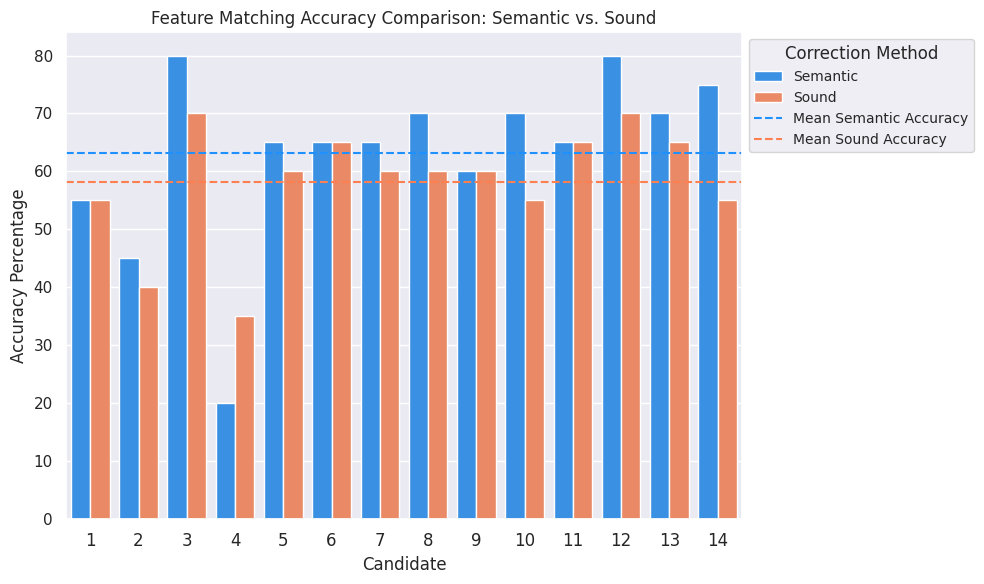

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))

# Custom color palette
palette = {"Semantic": "dodgerblue", "Sound": "coral"}

# Create the bar plot with the updated colors
bar = sns.barplot(data=long_df, x='Name', y='Accuracy', hue='Type', palette=palette)

# Calculate and draw the mean lines for Semantic and Sound
mean_semantic = long_df[long_df['Type'] == 'Semantic']['Accuracy'].mean()
mean_sound = long_df[long_df['Type'] == 'Sound']['Accuracy'].mean()

plt.axhline(mean_semantic, color="dodgerblue", linestyle='--', label='Average Semantic')
plt.axhline(mean_sound, color="coral", linestyle='--', label='Average Sound')

plt.title('Feature Matching Accuracy Comparison: Semantic vs. Sound')
plt.xlabel('Candidate')
plt.ylabel('Accuracy Percentage')

num_names = len(long_df['Name'].unique())
plt.xticks(ticks=range(num_names), labels=range(1, num_names + 1), rotation=0, ha="center", fontsize=12)

handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['Semantic', 'Sound', 'Mean Semantic Accuracy', 'Mean Sound Accuracy']
new_handles = [handles[0], handles[1], handles[-2], handles[-1]]
plt.legend(handles=new_handles, labels=new_labels, title='Correction Method', bbox_to_anchor=(1.0, 1), loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()


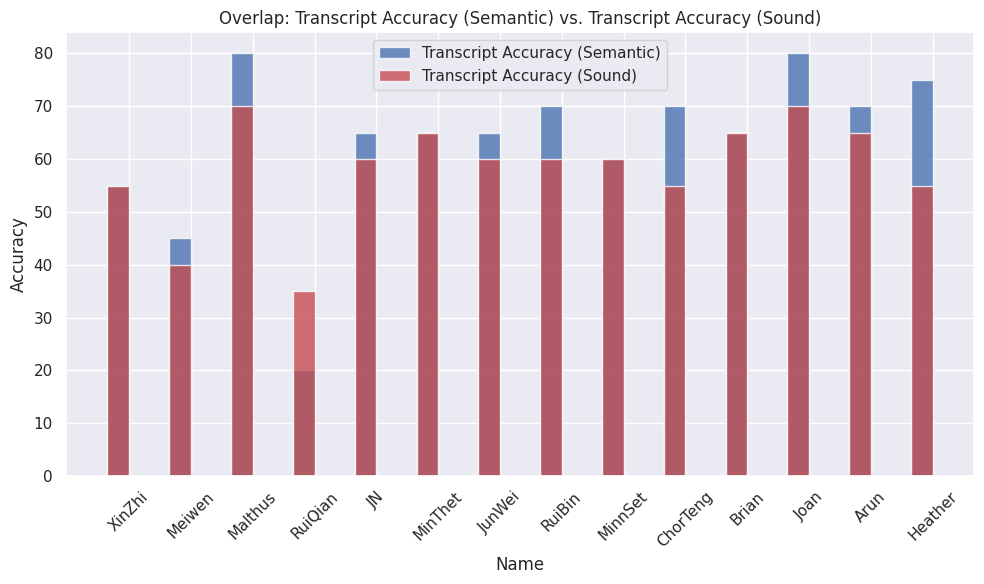

In [40]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10, 6))

# Get the number of categories
n_categories = combined.shape[0]

# Define the bar width
bar_width = 0.35

opacity = 0.8

index = np.arange(n_categories)

# Plot the first set of bars for 'transcript_accuracy_semantic'
plt.bar(index, combined['Semantic'], bar_width,
        alpha=opacity, color='b', label='Transcript Accuracy (Semantic)')

# Plot the second set of bars for 'transcript_accuracy_sound', overlaid with a different color
plt.bar(index, combined['Sound'], bar_width,
        alpha=opacity, color='r', label='Transcript Accuracy (Sound)')

# Add titles and labels
plt.xlabel('Name')
plt.ylabel('Accuracy')
plt.title('Overlap: Transcript Accuracy (Semantic) vs. Transcript Accuracy (Sound)')
plt.xticks(index + bar_width / 2, combined['Name'], rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


## **RAW TRANSCRIPTION ACCURACY**

In [41]:
import json, os

def get_namelist() -> list:
    return [file.split('.')[0] for file in os.listdir('../results/semantic')]

def get_gt_input() -> list:
    with open(f'../dataset/gt.json', 'r') as f:
        data = json.load(f)

    gt_list = []
    for i in range(len(data)):
        gt_list.append(data[i]['transcription_gt'])
    return list(map(lambda x: x.lower().strip().strip('.'), gt_list))

def check_accuracy(candidate: str, gt_list: list, name_list: list) -> float: 
    with open(f'../results/semantic/{candidate}.json', 'r') as f:
        data = json.load(f)

    res = []
    for i in range(len(data)):
        res.append(data[i]['raw_input'])

    res = list(map(lambda x: x.lower().strip().strip('.'), res))

    correct_count = 0
    for i in range(len(res)):
        if res[i] == gt_list[i]:
            correct_count += 1
    
    return (correct_count/len(res)) * 100

In [42]:
name_list = get_namelist()
gt_list = get_gt_input()
total_acc = 0
raw_dict = {}

for name in name_list:
    raw_dict[name] = check_accuracy(name, gt_list, name_list)

raw_dict

{'Meiwen': 30.0,
 'Joan': 25.0,
 'XinZhi': 45.0,
 'ChorTeng': 35.0,
 'JunWei': 50.0,
 'RuiBin': 35.0,
 'RuiQian': 20.0,
 'MinnSet': 40.0,
 'Malthus': 50.0,
 'MinThet': 30.0,
 'Heather': 60.0,
 'JN': 40.0,
 'Brian': 45.0,
 'Arun': 50.0}

In [43]:
df_raw = pd.DataFrame.from_dict(raw_dict, orient='index', columns=['Transcript_Accuracy'])
df_raw.index.name = 'Name'
df_raw

,Transcript_Accuracy
Name,
Meiwen,30.0
Joan,25.0
XinZhi,45.0
ChorTeng,35.0
JunWei,50.0
RuiBin,35.0
RuiQian,20.0
MinnSet,40.0
Malthus,50.0


In [44]:
import pandas as pd
df_semantic = pd.DataFrame.from_dict(hashmap_semantic, orient='index', columns=['Transcript_Accuracy', 'Feature_Accuracy'])
df_semantic.columns = ["transcript_accuracy", "feature_accuracy"]
df_semantic.index.name = 'Name'
df_semantic

,transcript_accuracy,feature_accuracy
Name,,
XinZhi,45.0,55.0
Meiwen,40.0,45.0
Malthus,70.0,80.0
RuiQian,10.0,20.0
JN,55.0,65.0
MinThet,45.0,65.0
JunWei,50.0,65.0
RuiBin,60.0,70.0
MinnSet,45.0,60.0


In [45]:
df_sound = pd.DataFrame.from_dict(hashmap_sound, orient='index', columns=['Transcript_Accuracy', 'Feature_Accuracy'])
df_sound.columns = ["transcript_accuracy", "feature_accuracy"]
df_sound.index.name = 'Name'
df_sound

,transcript_accuracy,feature_accuracy
Name,,
XinZhi,55.0,55.0
Meiwen,40.0,40.0
Malthus,65.0,70.0
RuiQian,35.0,35.0
JN,55.0,60.0
MinThet,50.0,65.0
JunWei,55.0,60.0
RuiBin,60.0,60.0
MinnSet,50.0,60.0


In [46]:
combined = pd.merge(df_sound, df_semantic, on='Name', suffixes=('_semantic', '_sound'), how='inner')
combined.drop(columns=['feature_accuracy_semantic', 'feature_accuracy_sound'], inplace=True)
# combined.rename(columns={"transcript_accuracy_semantic": "Semantic", "transcript_accuracy_sound": "Sound"}, inplace=True)
# combined.reset_index(inplace=True)
combined

,transcript_accuracy_semantic,transcript_accuracy_sound
Name,,
XinZhi,55.0,45.0
Meiwen,40.0,40.0
Malthus,65.0,70.0
RuiQian,35.0,10.0
JN,55.0,55.0
MinThet,50.0,45.0
JunWei,55.0,50.0
RuiBin,60.0,60.0
MinnSet,50.0,45.0


In [47]:
combined = pd.merge(combined, df_raw, on='Name', how='inner')
combined

,transcript_accuracy_semantic,transcript_accuracy_sound,Transcript_Accuracy
Name,,,
XinZhi,55.0,45.0,45.0
Meiwen,40.0,40.0,30.0
Malthus,65.0,70.0,50.0
RuiQian,35.0,10.0,20.0
JN,55.0,55.0,40.0
MinThet,50.0,45.0,30.0
JunWei,55.0,50.0,50.0
RuiBin,60.0,60.0,35.0
MinnSet,50.0,45.0,40.0


In [48]:
combined.rename(columns={"transcript_accuracy_semantic": "Semantic", "transcript_accuracy_sound": "Sound"
                         , "Transcript_Accuracy": "Raw"}, inplace=True)
combined.reset_index(inplace=True)
combined

,Name,Semantic,Sound,Raw
0,XinZhi,55.0,45.0,45.0
1,Meiwen,40.0,40.0,30.0
2,Malthus,65.0,70.0,50.0
3,RuiQian,35.0,10.0,20.0
4,JN,55.0,55.0,40.0
5,MinThet,50.0,45.0,30.0
6,JunWei,55.0,50.0,50.0
7,RuiBin,60.0,60.0,35.0
8,MinnSet,50.0,45.0,40.0
9,ChorTeng,55.0,60.0,35.0


In [49]:
import pandas as pd
df = pd.read_csv('combined.csv')
df.rename(columns={"Raw": "None"}, inplace=True)
df

,Name,Semantic,Sound,None
0,XinZhi,55.0,45.0,45.0
1,Meiwen,40.0,40.0,30.0
2,Malthus,65.0,70.0,50.0
3,RuiQian,35.0,10.0,20.0
4,JN,55.0,55.0,40.0
5,MinThet,50.0,45.0,30.0
6,JunWei,55.0,50.0,50.0
7,RuiBin,60.0,60.0,35.0
8,MinnSet,50.0,45.0,40.0
9,ChorTeng,55.0,60.0,35.0


<Figure size 500x600 with 0 Axes>

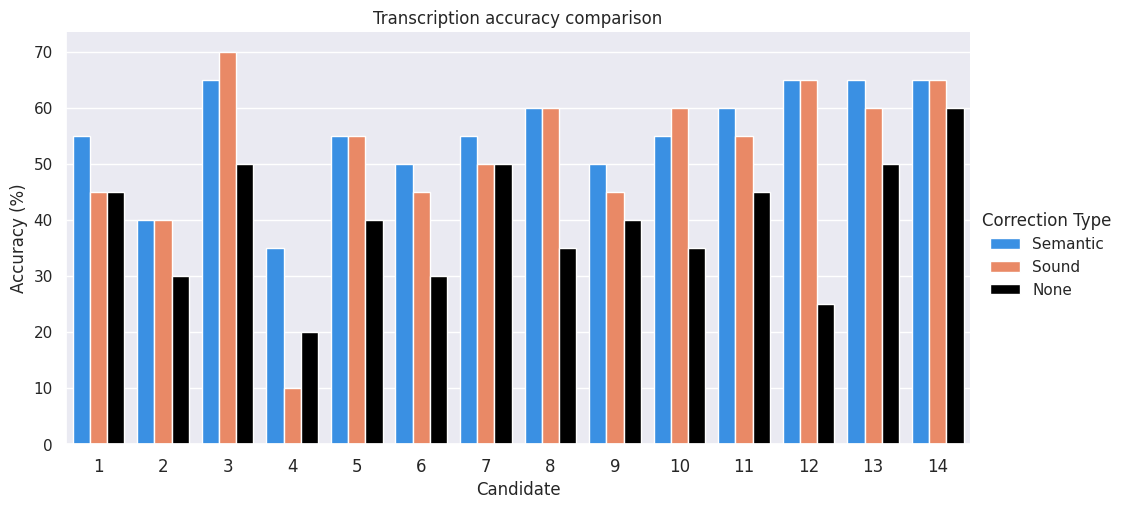

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = {"Semantic": "dodgerblue", "Sound": "coral", "None": "black"}
df_melted = pd.melt(df, id_vars=["Name"], var_name="Correction Type", value_name="Score")

plt.figure(figsize=(5, 6))  # Adjust the figure size as needed

sns.catplot(y="Score", x="Name", hue="Correction Type", data=df_melted, kind="bar", height=5, aspect=2, palette=palette)

plt.title("Transcription accuracy comparison")
plt.xlabel("Candidate")
plt.ylabel("Accuracy (%)")

num_names = len(df['Name'].unique())
plt.xticks(ticks=range(num_names), labels=range(1, num_names + 1), rotation=0, ha="center", fontsize=12)

plt.show()

In [51]:
df.drop(columns='Name', inplace=True)
df.sum()

Semantic    775.0
Sound       725.0
None        555.0
dtype: float64

In [52]:
df.sum() / len(df)

df_stat = pd.DataFrame(df.sum() / len(df), columns=['Average'])
df_stat.index.name = 'Category'
df_stat.reset_index(inplace=True)
df_stat

,Category,Average
0,Semantic,55.357143
1,Sound,51.785714
2,None,39.642857


/tmp/ipykernel_8908/178307170.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.catplot(y="Average", x="Category", data=df_stat, kind="bar", palette=palette, height=5, aspect=1, hue=None, legend=False)


<Figure size 1200x1000 with 0 Axes>

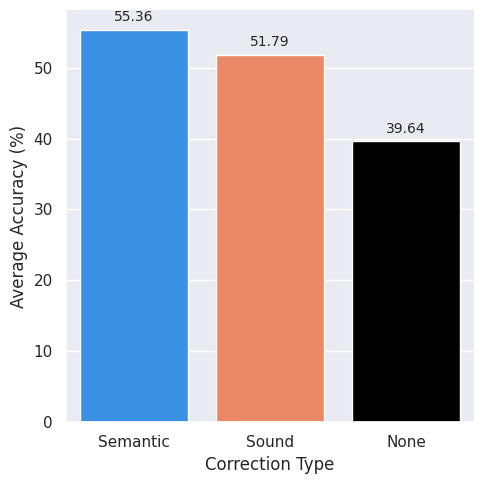

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = {"Semantic": "dodgerblue", "Sound": "coral", "None": "black"}
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed

ax = sns.catplot(y="Average", x="Category", data=df_stat, kind="bar", palette=palette, height=5, aspect=1, hue=None, legend=False)

# Accessing the underlying matplotlib axes
ax_ax = ax.ax

# Adding annotations to each bar
for p in ax_ax.patches:
    ax_ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                   fontsize=10)

# plt.title("Average Transcription accuracy comparison")
plt.xlabel("Correction Type")
plt.ylabel("Average Accuracy (%)")

plt.show()


TypeError: 'value' must be an instance of str or bytes, not a float

<Figure size 1000x600 with 0 Axes>

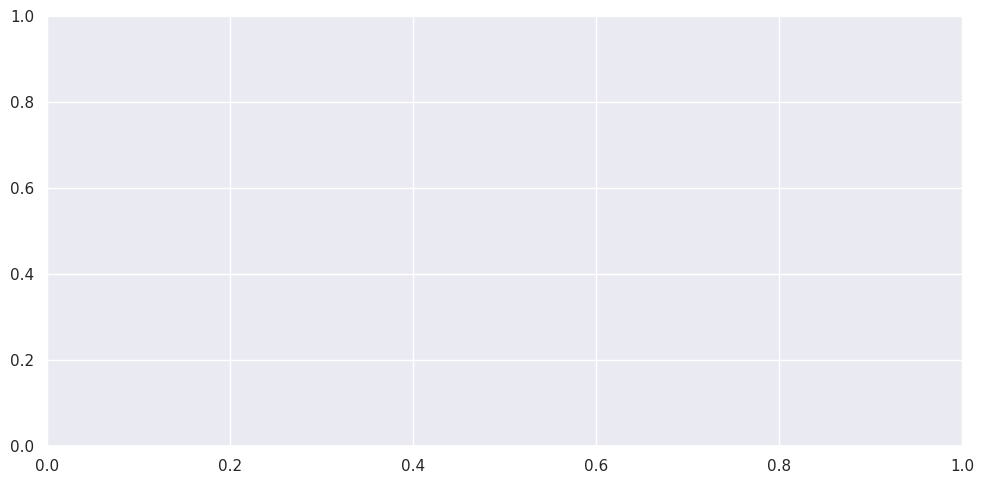

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_stat contains the data with columns: ['Category', 'Average']
palette = {"Semantic": "dodgerblue", "Sound": "coral", "Raw": "black"}
df_melted = pd.melt(df_stat, var_name="Category", value_name="Score")

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.catplot(y="Score", x="Category", hue="Category", data=df_melted, kind="bar", height=5, aspect=2, palette=palette, dodge=False)

plt.title("Transcript Accuracy Comparison: Semantic vs. Sound vs. Raw")
plt.xlabel("Category")
plt.ylabel("Accuracy (%)")

num_categories = len(df_stat['Category'])
plt.xticks(ticks=range(num_categories), labels=df_stat['Category'], rotation=0, ha="center", fontsize=12)

plt.show()
